# AI Sign Language Interpreter - Traditional ML Model Testing

## 1. Imports & Data Reading

In [ ]:
# Notebook: Testing Basic Machine Learning Models

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [20]:
X_train = pd.read_csv('../data/processed/X_train_scaled.csv')
X_test = pd.read_csv('../data/processed/X_test_scaled.csv')
Y_train = pd.read_csv('../data/processed/y_train.csv')
Y_test = pd.read_csv('../data/processed/y_test.csv')

Y_train

,label
0,3
1,6
2,2
3,2
4,13
...,...
27450,13
27451,23
27452,18
27453,17


## 2. Testing Random Forest Model

In [21]:
RF = RandomForestClassifier(n_estimators = 100, random_state = 207)
RF.fit(X_train, Y_train)

/Users/adityasharma/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=207)

In [22]:
Y_pred = RF.predict(X_test)

In [23]:
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")

Accuracy: 0.8096765197992192


## 3. KNN Classification

/Users/adityasharma/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/adityasharma/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/adityasharma/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/adityasharma/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vect

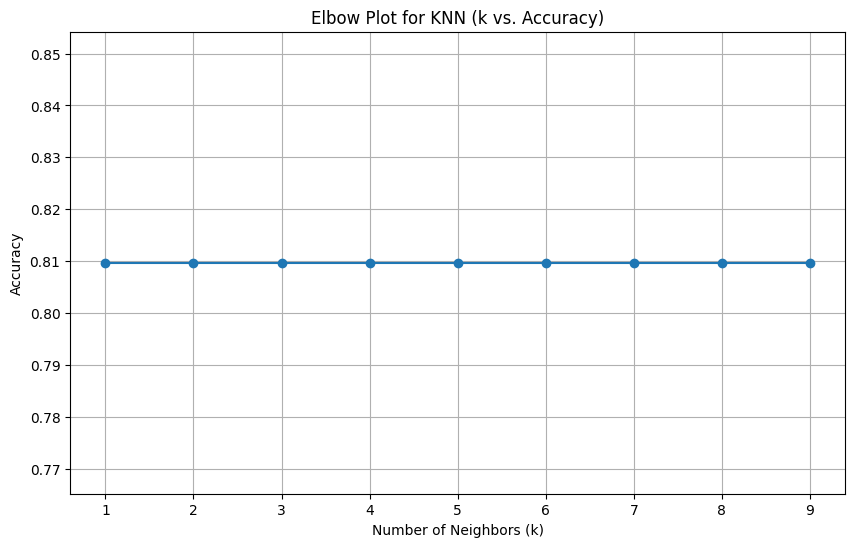

In [24]:
# Range of k values to test
k_range = range(1, 10)
accuracies = []

# Loop over k values
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    accuracies.append(acc)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.title('Elbow Plot for KNN (k vs. Accuracy)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Model accuracy plateaued as accuracy doesn't change for different k values. 

In [25]:
# Create model with standard 5 neighbors since model plateaued

KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)

/Users/adityasharma/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
Y_pred_knn = KNN.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")

Accuracy: 0.8096765197992192


## 4. Gradient Boosting Regression

In [27]:
gradient = HistGradientBoostingClassifier(max_iter=100, random_state=207)
gradient.fit(X_train, Y_train)

/Users/adityasharma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingClassifier(random_state=207)

In [28]:
Y_pred_gradient = gradient.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_gradient) * 100}%")

Accuracy: 78.17902955939766%
